In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('../dataset/digital_diet_mental_health.csv')
df

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,user_1996,58,Female,5.6,4.0,2.5,0.3,1.5,1.1,1.2,...,9,0.0,Urban,62,0,1,164.9,20,17,4.9
1996,user_1997,62,Female,3.9,3.1,1.0,1.5,1.1,2.7,4.1,...,8,2.7,Urban,29,0,0,172.6,15,15,25.5
1997,user_1998,64,Female,7.4,3.0,0.0,1.4,0.9,0.8,2.6,...,4,6.5,Urban,54,1,0,101.3,1,20,9.5
1998,user_1999,19,Male,4.2,4.4,2.3,0.9,1.4,1.7,1.2,...,8,2.6,Urban,28,0,0,123.7,1,11,13.4


In [6]:
df.info()
df.describe()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

,user_id,gender,location_type
count,2000,2000,2000
unique,2000,3,3
top,user_1984,Female,Urban
freq,1,935,999


In [7]:
user_id_col = 'user_id'
numerical_cols = [
    'age', 'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours',
    'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours', 'work_related_hours',
    'gaming_hours', 'entertainment_hours', 'sleep_duration_hours', 'sleep_quality',
    'mood_rating', 'stress_level', 'physical_activity_hours_per_week',
    'mental_health_score', 'caffeine_intake_mg_per_day', 'weekly_anxiety_score',
    'weekly_depression_score', 'mindfulness_minutes_per_day'
]

categorical_cols = [
    'gender', 'location_type', 'uses_wellness_apps', 'eats_healthy'
]

print(f"\nIdentified User ID column: {user_id_col}")
print(f"Identified Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Identified Categorical columns ({len(categorical_cols)}): {categorical_cols}")

all_identified_cols = [user_id_col] + numerical_cols + categorical_cols
print("\nAll columns successfully categorized.")


Identified User ID column: user_id
Identified Numerical columns (20): ['age', 'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours', 'work_related_hours', 'gaming_hours', 'entertainment_hours', 'sleep_duration_hours', 'sleep_quality', 'mood_rating', 'stress_level', 'physical_activity_hours_per_week', 'mental_health_score', 'caffeine_intake_mg_per_day', 'weekly_anxiety_score', 'weekly_depression_score', 'mindfulness_minutes_per_day']
Identified Categorical columns (4): ['gender', 'location_type', 'uses_wellness_apps', 'eats_healthy']

All columns successfully categorized.


In [9]:
potential_continuous_targets = [
    'mental_health_score',
    'weekly_depression_score',
    'weekly_anxiety_score',
    'mood_rating',
    'stress_level',
    'sleep_duration_hours',
    'caffeine_intake_mg_per_day',
    'physical_activity_hours_per_week',
    'daily_screen_time_hours',
    'social_media_hours'       
]

potential_categorical_targets = [
    'uses_wellness_apps',  
    'eats_healthy',        
    'gender',             
    'location_type',        
]

print(f"\nPotential Continuous Targets: {potential_continuous_targets}")
print(f"Potential Categorical Targets: {potential_categorical_targets}")
valid_continuous_targets = [t for t in potential_continuous_targets if t in df.columns and t in numerical_cols]
valid_categorical_targets = [t for t in potential_categorical_targets if t in df.columns and t in categorical_cols]
print(f"\nValid Continuous Targets in DataFrame: {valid_continuous_targets}")
print(f"Valid Categorical Targets in DataFrame: {valid_categorical_targets}")


Potential Continuous Targets: ['mental_health_score', 'weekly_depression_score', 'weekly_anxiety_score', 'mood_rating', 'stress_level', 'sleep_duration_hours', 'caffeine_intake_mg_per_day', 'physical_activity_hours_per_week', 'daily_screen_time_hours', 'social_media_hours']
Potential Categorical Targets: ['uses_wellness_apps', 'eats_healthy', 'gender', 'location_type']

Valid Continuous Targets in DataFrame: ['mental_health_score', 'weekly_depression_score', 'weekly_anxiety_score', 'mood_rating', 'stress_level', 'sleep_duration_hours', 'caffeine_intake_mg_per_day', 'physical_activity_hours_per_week', 'daily_screen_time_hours', 'social_media_hours']
Valid Categorical Targets in DataFrame: ['uses_wellness_apps', 'eats_healthy', 'gender', 'location_type']


In [12]:
print("Analyzing relationships: Continuous Targets vs Continuous Features (Correlation)")

for target in valid_continuous_targets:
    print(f"\n--- Correlation with target: {target} ---")

    # Select only numerical columns, excluding the target itself
    features_to_correlate = [col for col in numerical_cols if col != target]

    if not features_to_correlate:
        print(f"No numerical features available to correlate with {target}.")
        continue

    # Calculate Pearson correlation matrix subset
    # Ensure we only calculate correlation between the target and the selected features
    correlation_matrix = df[features_to_correlate + [target]].corr(numeric_only=True)

    # Get the correlations specifically with the target variable
    correlations = correlation_matrix[target].sort_values(ascending=False)

    print("Pearson Correlations:")
    print(correlations)

Analyzing relationships: Continuous Targets vs Continuous Features (Correlation)

--- Correlation with target: mental_health_score ---
Pearson Correlations:
mental_health_score                 1.000000
tablet_usage_hours                  0.046056
laptop_usage_hours                  0.029950
tv_usage_hours                      0.025501
caffeine_intake_mg_per_day          0.021843
social_media_hours                  0.015515
phone_usage_hours                   0.014648
age                                 0.009201
gaming_hours                        0.008681
daily_screen_time_hours             0.005517
work_related_hours                  0.005486
weekly_anxiety_score                0.000210
stress_level                       -0.000044
weekly_depression_score            -0.000069
sleep_duration_hours               -0.011103
entertainment_hours                -0.012464
physical_activity_hours_per_week   -0.013751
sleep_quality                      -0.014240
mindfulness_minutes_per_day      

Visualizing relationships: Continuous Targets vs Continuous Features (Scatter Plots)

--- Scatter Plots for target: mental_health_score ---
Plotting top 5 features by absolute correlation for mental_health_score: ['tablet_usage_hours', 'laptop_usage_hours', 'mood_rating', 'mindfulness_minutes_per_day', 'tv_usage_hours']


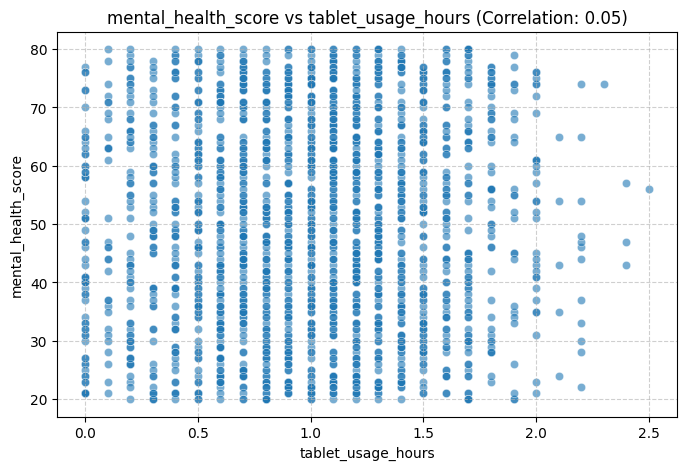

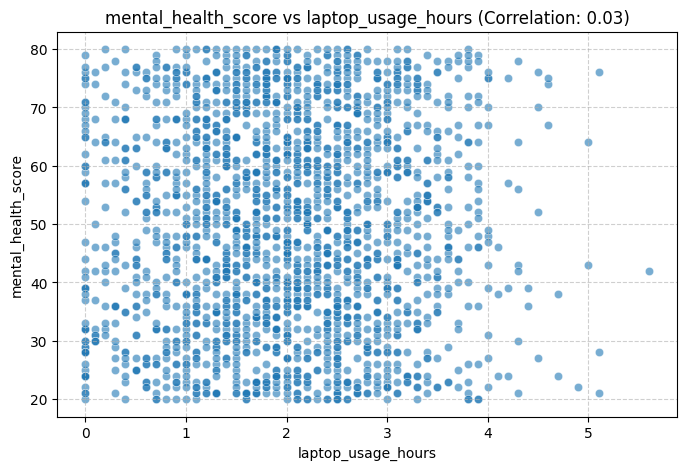

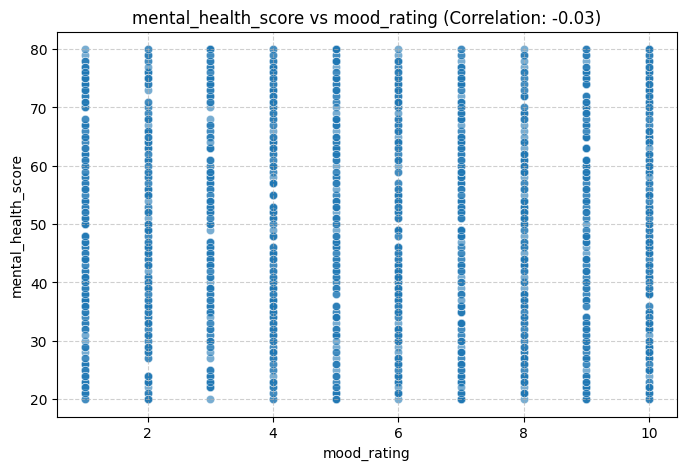

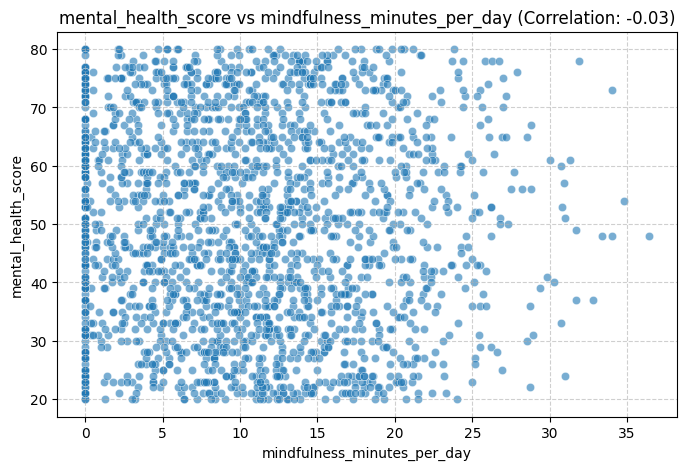

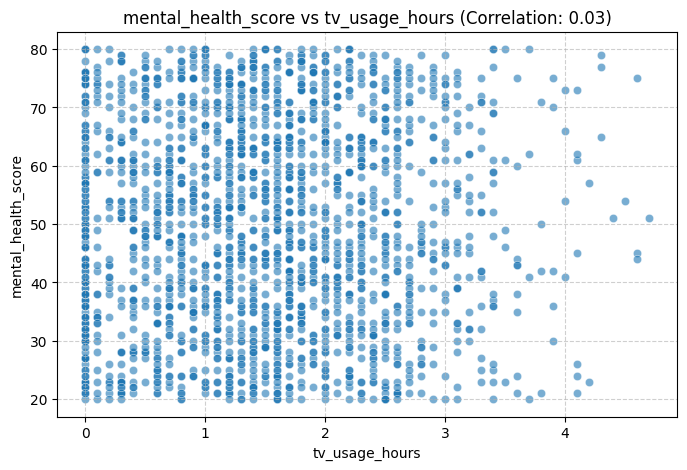


--- Scatter Plots for target: weekly_depression_score ---
Plotting top 5 features by absolute correlation for weekly_depression_score: ['mood_rating', 'entertainment_hours', 'social_media_hours', 'mindfulness_minutes_per_day', 'weekly_anxiety_score']


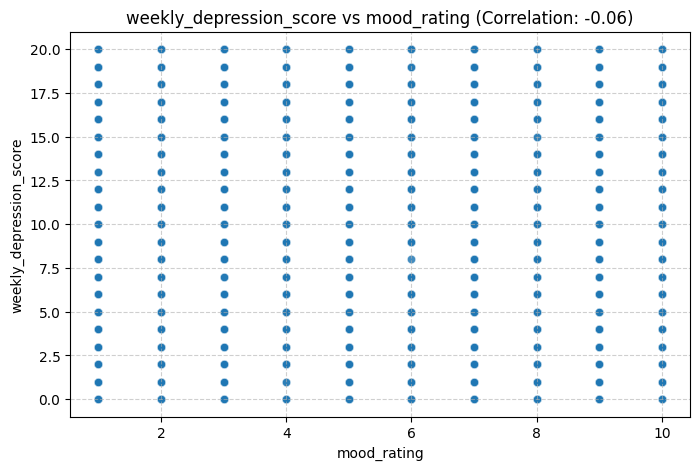

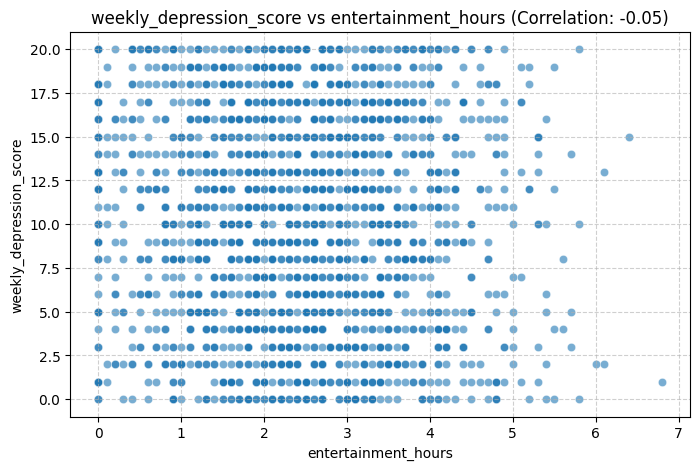

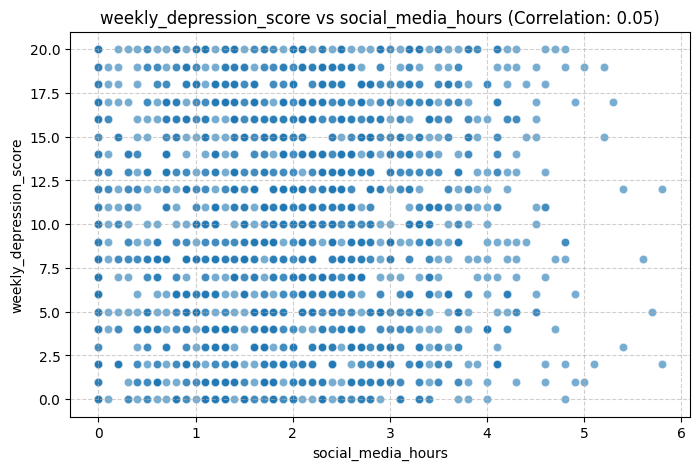

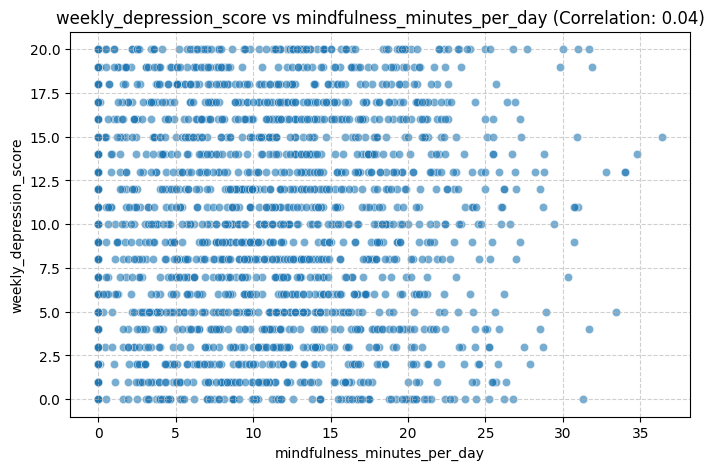

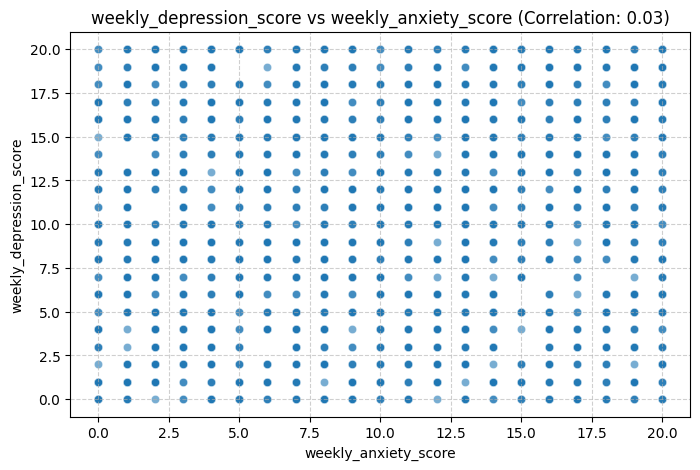

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Visualizing relationships: Continuous Targets vs Continuous Features (Scatter Plots)")

# Choose one or two continuous targets to visualize extensively
targets_to_plot = ['mental_health_score', 'weekly_depression_score'] # Add others you are interested in

for target in targets_to_plot:
    if target not in valid_continuous_targets:
        print(f"Target '{target}' not in valid continuous targets. Skipping scatter plots.")
        continue

    print(f"\n--- Scatter Plots for target: {target} ---")

    # Select numerical columns, including the target itself, to calculate the matrix
    cols_for_corr_matrix = [col for col in numerical_cols if col != target] + [target]

    if len(cols_for_corr_matrix) < 2:
         print(f"Not enough numerical columns to calculate correlation matrix for {target}.")
         continue

    # Calculate Pearson correlation matrix subset
    # Ensure numerical_cols and target are lists of column names present in df
    try:
        correlation_matrix = df[cols_for_corr_matrix].corr(numeric_only=True)

        # Get the correlations specifically with the target variable (THIS SHOULD RETURN A SERIES)
        # Ensure you use SINGLE brackets [target] here
        correlations = correlation_matrix[target].sort_values(ascending=False)

    except KeyError as e:
        print(f"Error calculating correlation matrix for target {target}: {e}")
        continue
    except Exception as e:
        print(f"An unexpected error occurred calculating correlation for target {target}: {e}")
        continue


    # Select top N features by absolute correlation to plot
    # Drop the correlation of the target with itself (which is always 1)
    # Handle potential NaNs in correlation calculation before taking absolute value and sorting
    correlations_abs = correlations.drop(target, errors='ignore').abs().dropna()

    if correlations_abs.empty:
        print(f"No valid correlations found to plot for {target}.")
        continue

    top_n_features = correlations_abs.sort_values(ascending=False).head(5).index.tolist()


    if not top_n_features:
        print(f"No top features found by absolute correlation to plot for {target}.")
        continue

    print(f"Plotting top 5 features by absolute correlation for {target}: {top_n_features}")

    # Create scatter plots for the top features
    for feature in top_n_features:
        plt.figure(figsize=(8, 5))
        # Ensure the feature is in the dataframe columns before plotting
        if feature in df.columns:
            # Get the actual correlation value for the plot title
            corr_value = correlations.get(feature, float('nan')) # Use .get to handle potential missing feature after dropping target
            sns.scatterplot(data=df, x=feature, y=target, alpha=0.6)
            plt.title(f'{target} vs {feature} (Correlation: {corr_value:.2f})')
            plt.xlabel(feature)
            plt.ylabel(target)
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.show()
        else:
            print(f"  Feature '{feature}' not found in DataFrame columns, skipping plot.")

In [15]:
import scipy.stats as stats

print("\nAnalyzing relationships: Continuous Targets vs Categorical Features (Group Stats & Tests)")

# Choose one or two continuous targets to analyze
targets_to_analyze = ['mental_health_score', 'weekly_depression_score'] # Add others

for target in targets_to_analyze:
    if target not in valid_continuous_targets:
         print(f"Target '{target}' not in valid continuous targets. Skipping categorical analysis.")
         continue

    print(f"\n--- Analyzing target: {target} by Categorical Features ---")

    for feature in valid_categorical_targets:
        print(f"\n  --- Analyzing {target} by {feature} ---")

        # Group data by the categorical feature and calculate stats for the target
        group_stats = df.groupby(feature)[target].agg(['mean', 'median', 'std', 'count']).dropna()
        print("  Group Statistics:")
        print(group_stats)

        # Perform statistical test (T-test for 2 categories, ANOVA for > 2 categories)
        unique_categories = df[feature].dropna().unique()
        valid_groups_data = [df[df[feature] == cat][target].dropna() for cat in unique_categories]
        valid_groups_data = [group for group in valid_groups_data if len(group) > 1] # Filter out groups with <= 1 sample

        if len(valid_groups_data) == 2:
            # Independent samples t-test (parametric - assumes normality & equal variance)
            # Consider checking assumptions or using non-parametric test like Mann-Whitney U
            try:
                t_stat, p_value = stats.ttest_ind(valid_groups_data[0], valid_groups_data[1], nan_policy='omit')
                print(f"  T-test p-value: {p_value:.4f} (Lower p suggests significant mean difference)")
            except ValueError as e:
                 print(f"  Could not perform T-test: {e}")

        elif len(valid_groups_data) > 2:
            # ANOVA (parametric - assumes normality, equal variance, independence)
            # Consider checking assumptions or using non-parametric test like Kruskal-Wallis
             try:
                f_stat, p_value = stats.f_oneway(*valid_groups_data)
                print(f"  ANOVA p-value: {p_value:.4f} (Lower p suggests significant mean differences across groups)")
             except ValueError as e:
                print(f"  Could not perform ANOVA: {e}")
        elif len(valid_groups_data) <= 1:
             print("  Not enough valid groups to perform statistical test.")


Analyzing relationships: Continuous Targets vs Categorical Features (Group Stats & Tests)

--- Analyzing target: mental_health_score by Categorical Features ---

  --- Analyzing mental_health_score by uses_wellness_apps ---
  Group Statistics:
                         mean  median        std  count
uses_wellness_apps                                     
0                   49.302857    49.0  17.799782   1225
1                   50.200000    50.0  17.136102    775
  T-test p-value: 0.2654 (Lower p suggests significant mean difference)

  --- Analyzing mental_health_score by eats_healthy ---
  Group Statistics:
                   mean  median        std  count
eats_healthy                                     
0             49.593909    49.0  17.513049    985
1             49.705419    50.0  17.587788   1015
  T-test p-value: 0.8871 (Lower p suggests significant mean difference)

  --- Analyzing mental_health_score by gender ---
  Group Statistics:
             mean  median        std  c


Visualizing relationships: Continuous Targets vs Categorical Features (Box Plots)

--- Box Plots for target: mental_health_score by Categorical Features ---


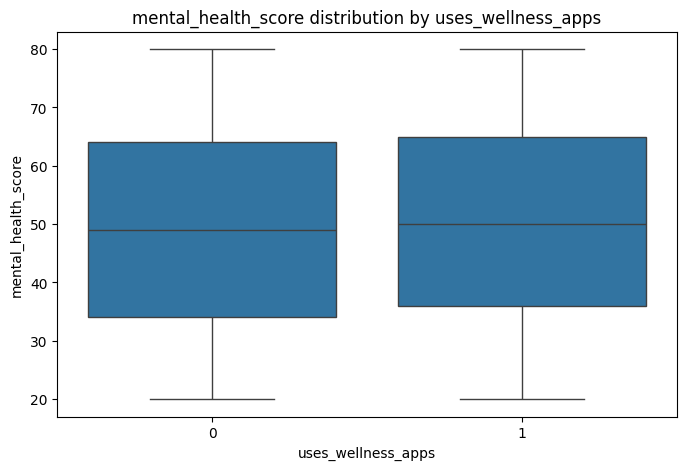

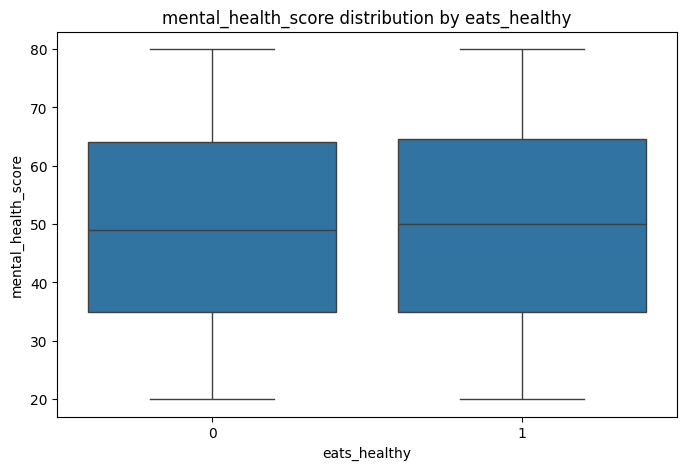

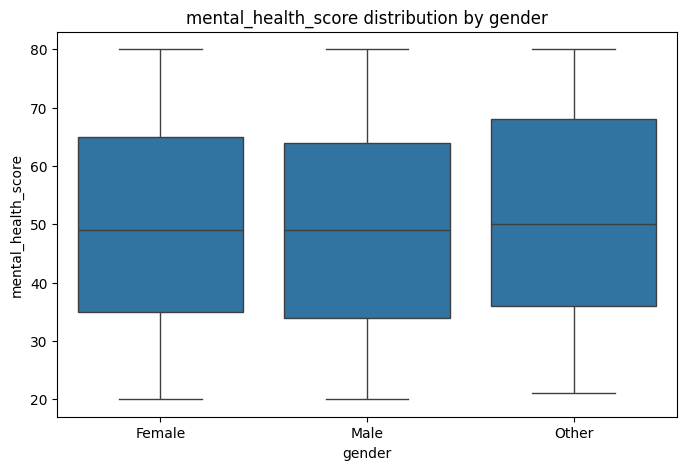

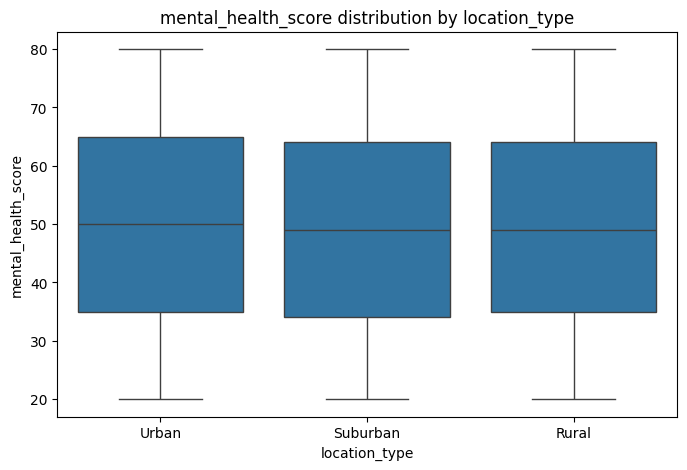


--- Box Plots for target: weekly_depression_score by Categorical Features ---


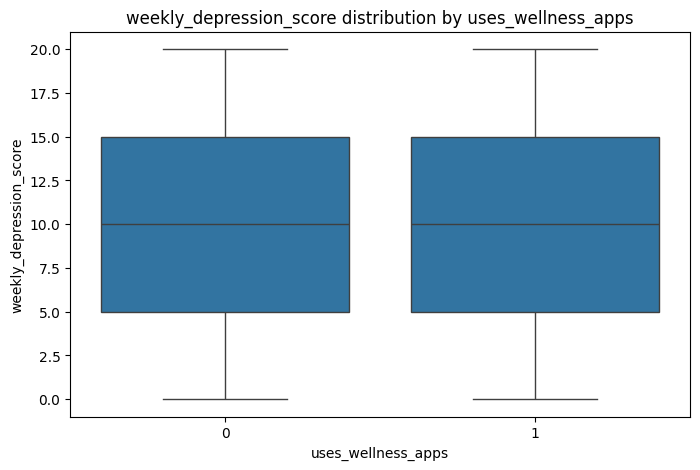

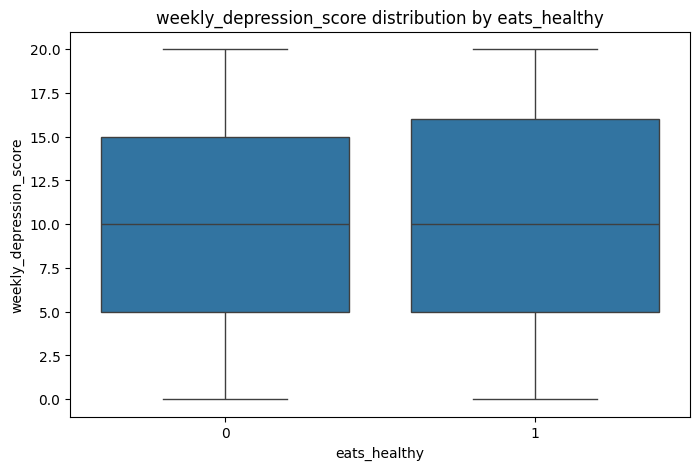

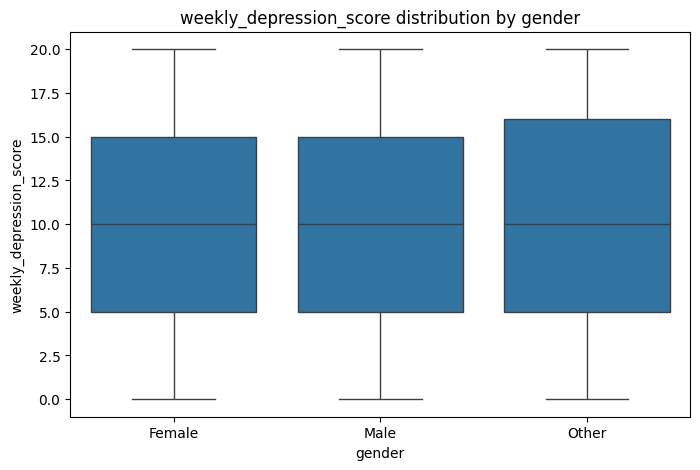

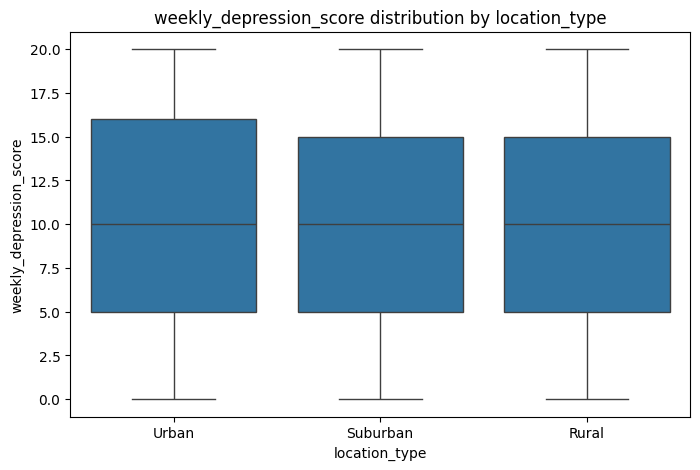

In [16]:
print("\nVisualizing relationships: Continuous Targets vs Categorical Features (Box Plots)")

# Use the same targets as the previous cell
targets_to_plot = ['mental_health_score', 'weekly_depression_score'] # Add others

for target in targets_to_plot:
    if target not in valid_continuous_targets:
         print(f"Target '{target}' not in valid continuous targets. Skipping box plots.")
         continue
    print(f"\n--- Box Plots for target: {target} by Categorical Features ---")

    for feature in valid_categorical_targets:
         plt.figure(figsize=(8, 5))
         # Ensure the categorical feature is treated as categorical by seaborn
         sns.boxplot(data=df, x=feature, y=target)
         # sns.violinplot(data=df, x=feature, y=target) # Alternative visualization
         plt.title(f'{target} distribution by {feature}')
         plt.xlabel(feature)
         plt.ylabel(target)
         plt.show()

In [17]:
import scipy.stats as stats

print("\nAnalyzing relationships: Categorical Targets vs Continuous Features (Distribution & Tests)")

# Choose one or two categorical targets to analyze
targets_to_analyze_cat = ['uses_wellness_apps', 'eats_healthy'] # Add others

for target in targets_to_analyze_cat:
    if target not in valid_categorical_targets:
        print(f"Target '{target}' not in valid categorical targets. Skipping continuous feature analysis.")
        continue
    print(f"\n--- Analyzing Continuous Features by target: {target} ---")

    # Select only numerical columns, excluding columns that might be the target
    features_to_analyze = [col for col in numerical_cols if col != target]

    for feature in features_to_analyze:
        print(f"\n  --- Analyzing {feature} by {target} ---")

        # Group stats are less intuitive here, but looking at mean/median of feature within each target category is useful
        group_stats = df.groupby(target)[feature].agg(['mean', 'median', 'std', 'count']).dropna()
        print("  Group Statistics (Feature mean/median by Target category):")
        print(group_stats)

        # Perform statistical test (e.g., Mann-Whitney U for binary target, Kruskal-Wallis for >2)
        # These are non-parametric and don't assume normality or equal variance
        unique_targets = df[target].dropna().unique()
        valid_groups_data = [df[df[target] == cat][feature].dropna() for cat in unique_targets]
        valid_groups_data = [group for group in valid_groups_data if len(group) > 1] # Filter out groups with <= 1 sample

        if len(valid_groups_data) == 2:
            try:
                # Mann-Whitney U test (non-parametric alternative to t-test)
                stat, p_value = stats.mannwhitneyu(valid_groups_data[0], valid_groups_data[1])
                print(f"  Mann-Whitney U test p-value: {p_value:.4f} (Lower p suggests different distributions)")
            except ValueError as e:
                print(f"  Could not perform Mann-Whitney U test: {e}")

        elif len(valid_groups_data) > 2:
            try:
                # Kruskal-Wallis H test (non-parametric alternative to ANOVA)
                stat, p_value = stats.kruskal(*valid_groups_data)
                print(f"  Kruskal-Wallis H test p-value: {p_value:.4f} (Lower p suggests different distributions across groups)")
            except ValueError as e:
                print(f"  Could not perform Kruskal-Wallis test: {e}")
        elif len(valid_groups_data) <= 1:
             print("  Not enough valid groups to perform statistical test.")


Analyzing relationships: Categorical Targets vs Continuous Features (Distribution & Tests)

--- Analyzing Continuous Features by target: uses_wellness_apps ---

  --- Analyzing age by uses_wellness_apps ---
  Group Statistics (Feature mean/median by Target category):
                         mean  median        std  count
uses_wellness_apps                                     
0                   38.213878    38.0  14.884522   1225
1                   39.740645    41.0  14.961487    775
  Mann-Whitney U test p-value: 0.0249 (Lower p suggests different distributions)

  --- Analyzing daily_screen_time_hours by uses_wellness_apps ---
  Group Statistics (Feature mean/median by Target category):
                        mean  median       std  count
uses_wellness_apps                                   
0                   5.982776     6.0  1.960514   1225
1                   6.093290     6.1  1.994840    775
  Mann-Whitney U test p-value: 0.3506 (Lower p suggests different distributions)




Visualizing relationships: Categorical Targets vs Continuous Features (Box/Density Plots)

--- Plots for Continuous Features by target: uses_wellness_apps ---


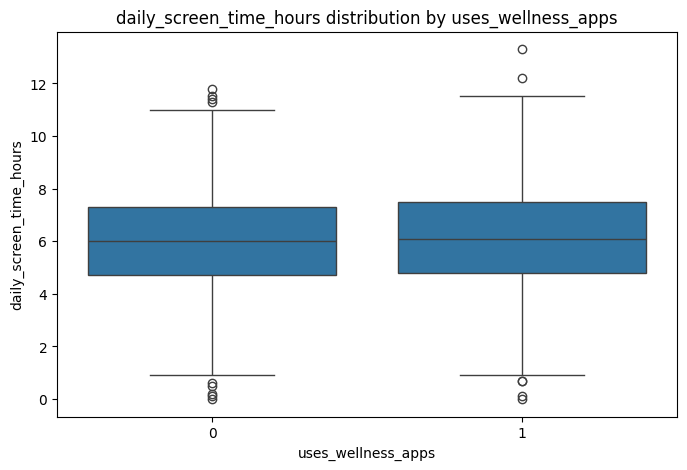

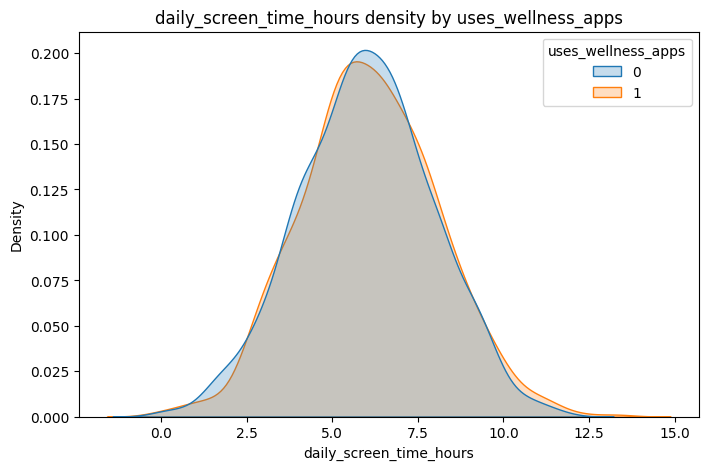

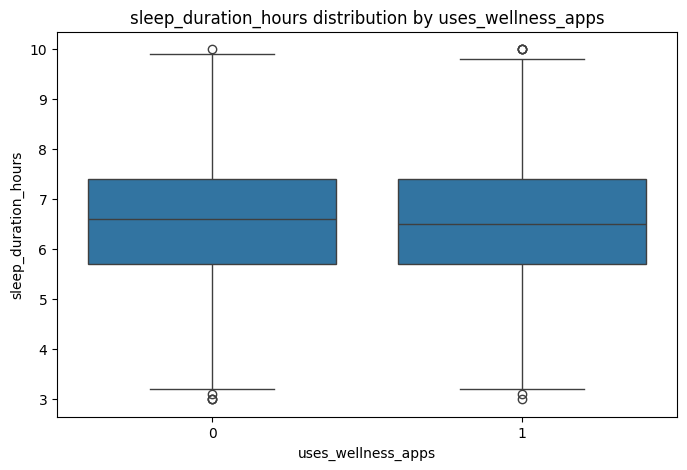

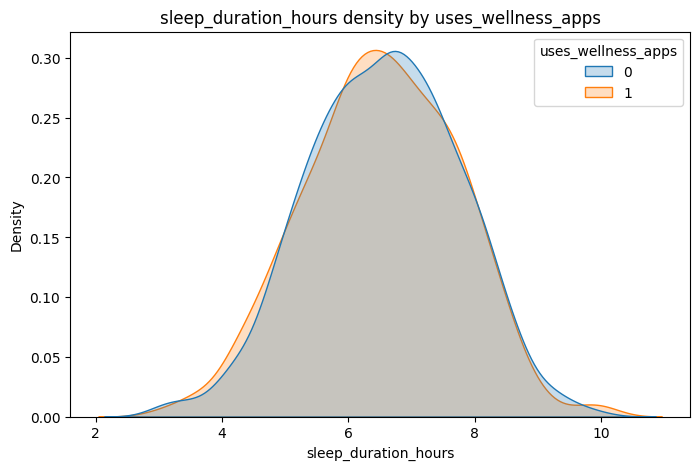

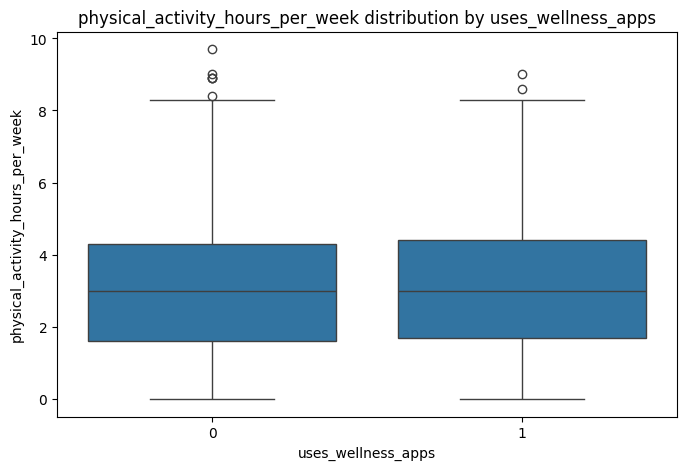

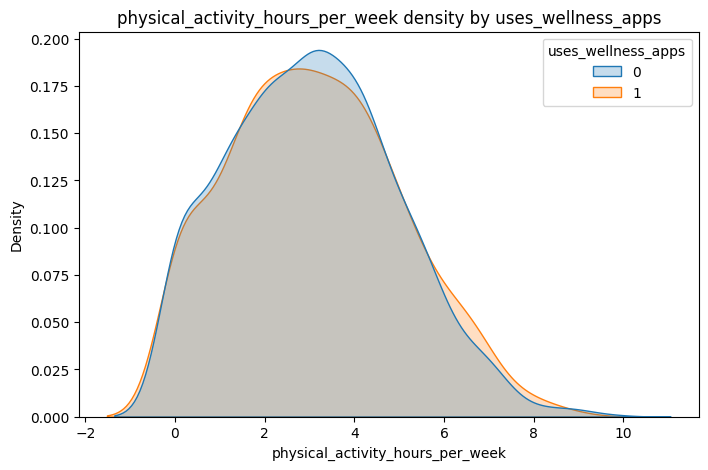

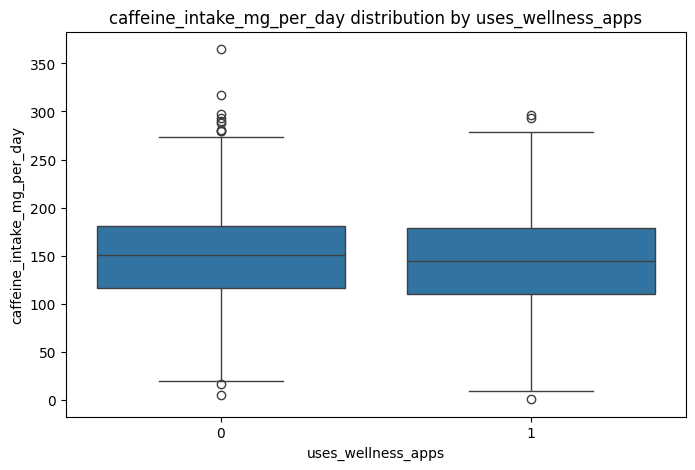

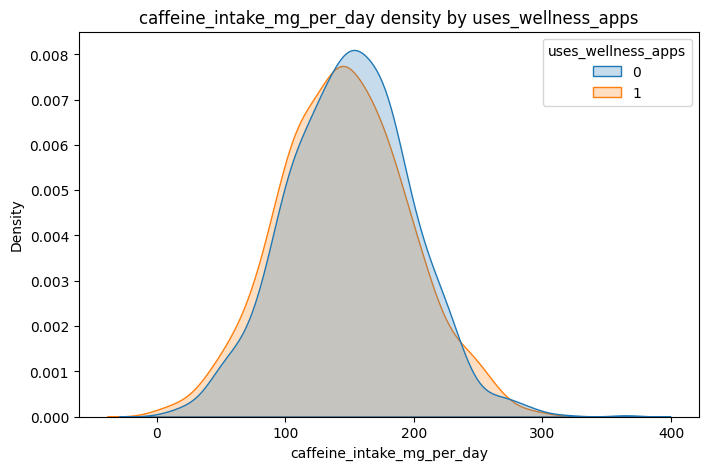


--- Plots for Continuous Features by target: eats_healthy ---


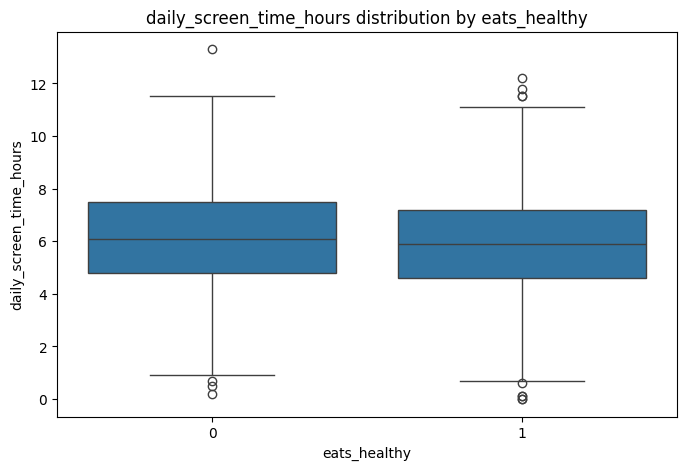

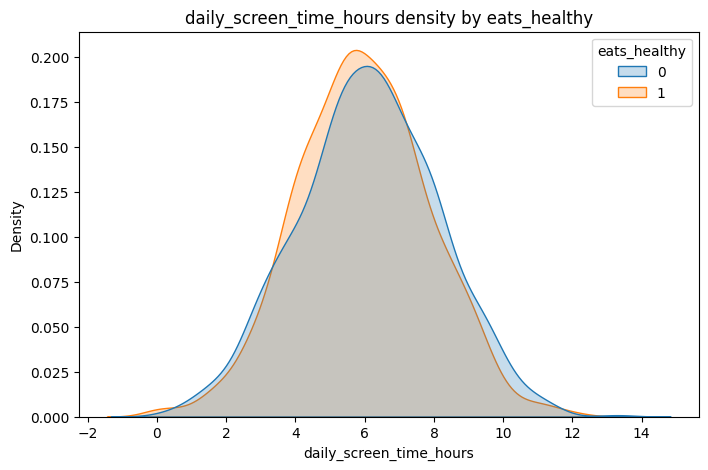

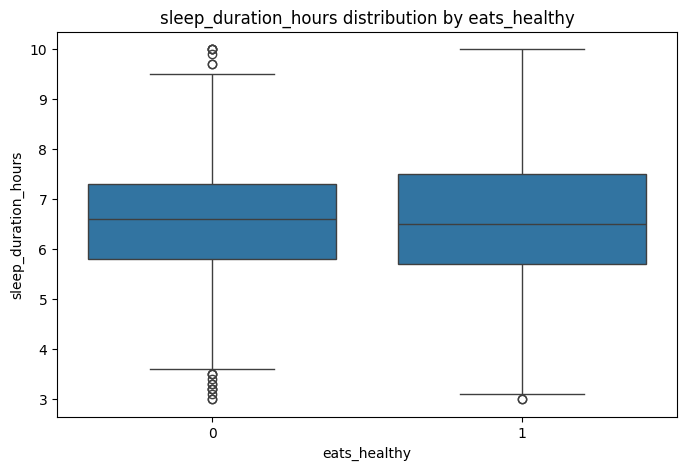

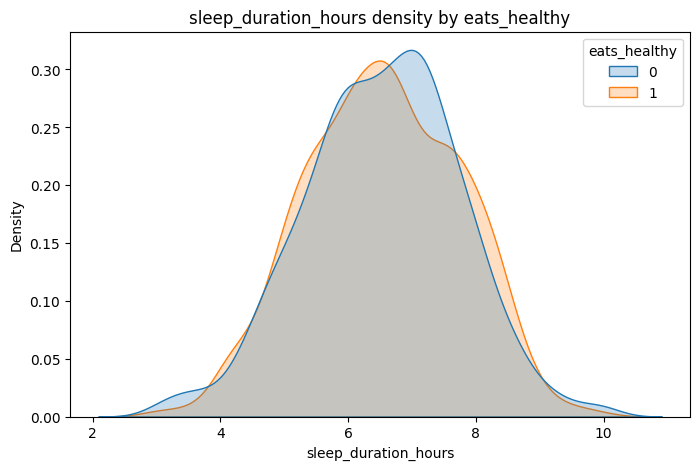

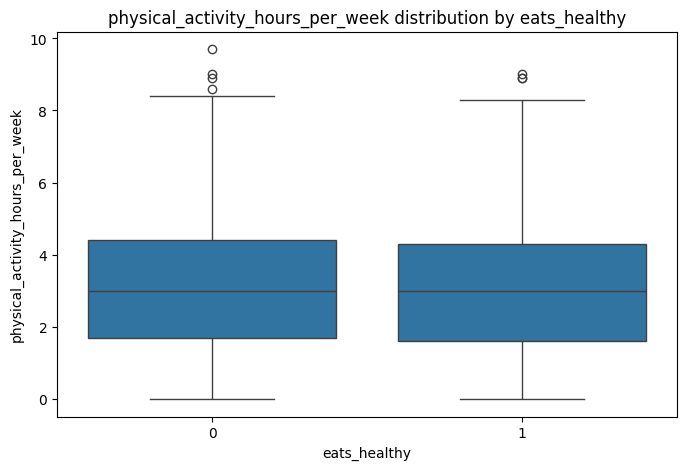

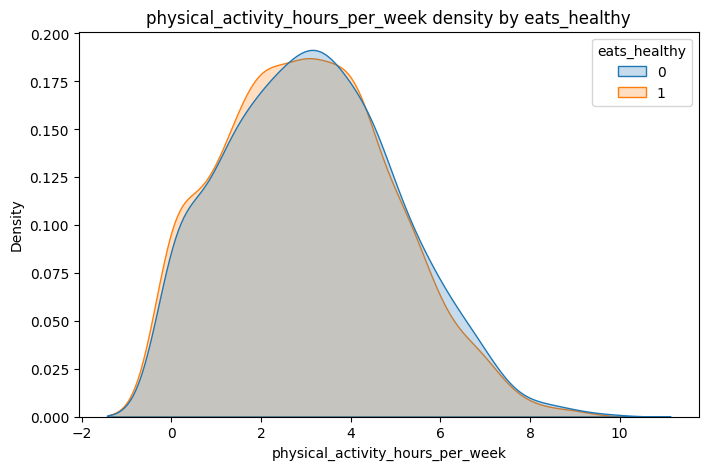

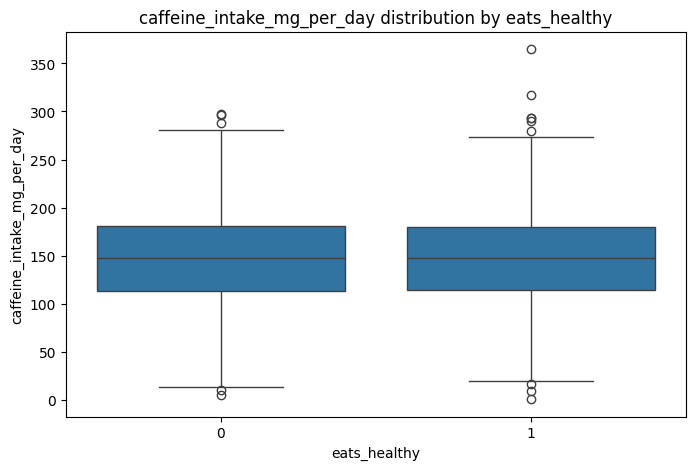

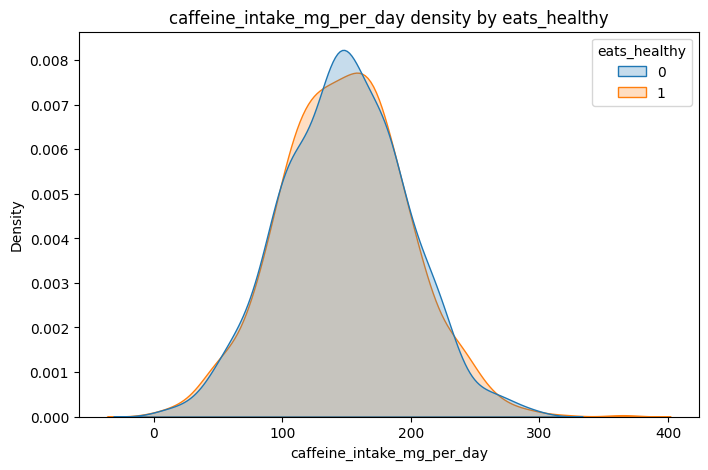

In [18]:
print("\nVisualizing relationships: Categorical Targets vs Continuous Features (Box/Density Plots)")

# Use the same targets as the previous cell
targets_to_plot_cat = ['uses_wellness_apps', 'eats_healthy'] # Add others

for target in targets_to_plot_cat:
    if target not in valid_categorical_targets:
        print(f"Target '{target}' not in valid categorical targets. Skipping continuous feature plots.")
        continue
    print(f"\n--- Plots for Continuous Features by target: {target} ---")

    # Select a few continuous features based on potential interest or results from the previous cell
    features_to_plot = ['daily_screen_time_hours', 'sleep_duration_hours', 'physical_activity_hours_per_week', 'caffeine_intake_mg_per_day'] # Select relevant features

    for feature in features_to_plot:
        if feature not in numerical_cols or feature == target:
             print(f"  Skipping plot for {feature} vs {target} as it's not a valid feature or is the target itself.")
             continue

        # Box plot (good for median, quartiles, outliers)
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=target, y=feature)
        plt.title(f'{feature} distribution by {target}')
        plt.xlabel(target)
        plt.ylabel(feature)
        plt.show()

        # Density plot (good for showing the overall shape of the distribution)
        # Drop NaN values in the feature or target before plotting density
        df_plot = df.dropna(subset=[feature, target])
        if not df_plot.empty:
            plt.figure(figsize=(8, 5))
            sns.kdeplot(data=df_plot, x=feature, hue=target, fill=True, common_norm=False)
            plt.title(f'{feature} density by {target}')
            plt.xlabel(feature)
            plt.ylabel('Density')
            plt.show()
        else:
            print(f"  Not enough data to plot density for {feature} by {target}.")

In [19]:
import scipy.stats as stats

print("\nAnalyzing relationships: Categorical Targets vs Categorical Features (Crosstab & Chi-squared)")

# Choose one or two categorical targets to analyze
targets_to_analyze_cat = ['uses_wellness_apps', 'eats_healthy'] # Add others

for target in targets_to_analyze_cat:
     if target not in valid_categorical_targets:
        print(f"Target '{target}' not in valid categorical targets. Skipping categorical feature analysis.")
        continue
     print(f"\n--- Analyzing Categorical Features by target: {target} ---")

     # Select other categorical columns, excluding the target itself
     features_to_analyze = [col for col in valid_categorical_targets if col != target]

     for feature in features_to_analyze:
        print(f"\n  --- Analyzing {feature} vs {target} ---")

        # Create a contingency table
        # Drop NaN values in both columns for the crosstab
        contingency_table = pd.crosstab(df[feature], df[target]).dropna(how='all', axis=1).dropna(how='all', axis=0)

        if contingency_table.empty:
            print(f"  Contingency table for {feature} vs {target} is empty after dropping NaNs.")
            continue

        print("  Contingency Table (Counts):")
        print(contingency_table)

        # Perform Chi-squared test of independence
        # Check if the table has enough data (e.g., total counts > 0 and degrees of freedom > 0)
        if contingency_table.sum().sum() > 0 and (contingency_table.shape[0]-1) * (contingency_table.shape[1]-1) > 0:
            try:
                chi2_stat, p_value, dof, ex = stats.chi2_contingency(contingency_table)
                print(f"  Chi-squared Test p-value: {p_value:.4f} (Lower p suggests significant association)")
            except ValueError as e:
                print(f"  Could not perform Chi-squared test: {e}")
            except IndexError as e: # Handle cases where a category has 0 count in one variable
                 print(f"  Could not perform Chi-squared test due to zero counts in some categories: {e}")
        else:
             print("  Not enough data in contingency table or insufficient degrees of freedom to perform Chi-squared test.")


Analyzing relationships: Categorical Targets vs Categorical Features (Crosstab & Chi-squared)

--- Analyzing Categorical Features by target: uses_wellness_apps ---

  --- Analyzing eats_healthy vs uses_wellness_apps ---
  Contingency Table (Counts):
uses_wellness_apps    0    1
eats_healthy                
0                   587  398
1                   638  377
  Chi-squared Test p-value: 0.1466 (Lower p suggests significant association)

  --- Analyzing gender vs uses_wellness_apps ---
  Contingency Table (Counts):
uses_wellness_apps    0    1
gender                      
Female              586  349
Male                533  349
Other               106   77
  Chi-squared Test p-value: 0.3865 (Lower p suggests significant association)

  --- Analyzing location_type vs uses_wellness_apps ---
  Contingency Table (Counts):
uses_wellness_apps    0    1
location_type               
Rural               223  173
Suburban            378  227
Urban               624  375
  Chi-squared Test p


Visualizing relationships: Categorical Targets vs Categorical Features (Count Plots)

--- Count Plots for Categorical Features by target: uses_wellness_apps ---


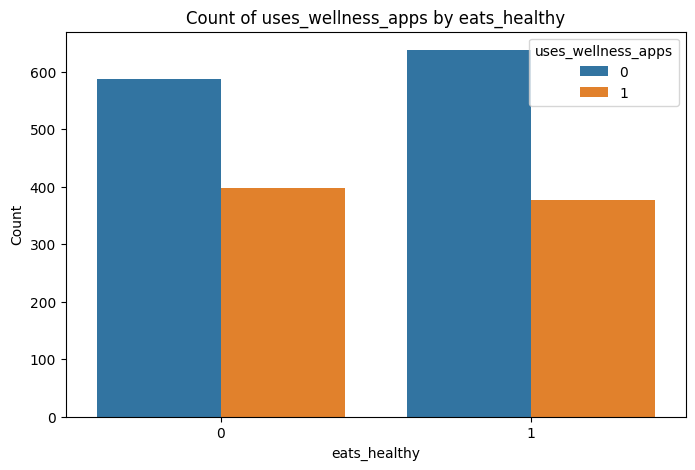

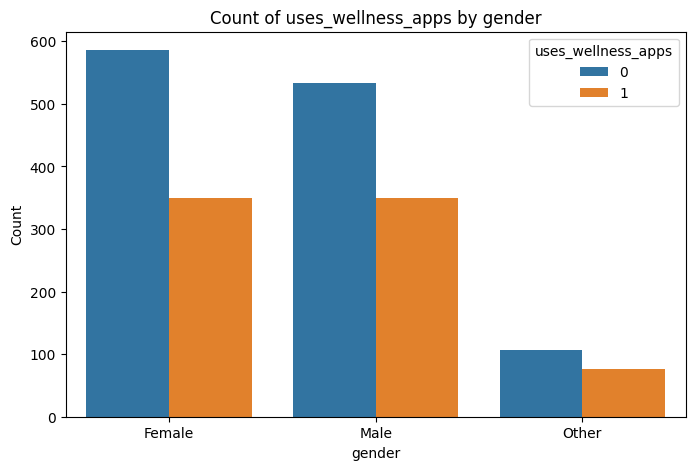

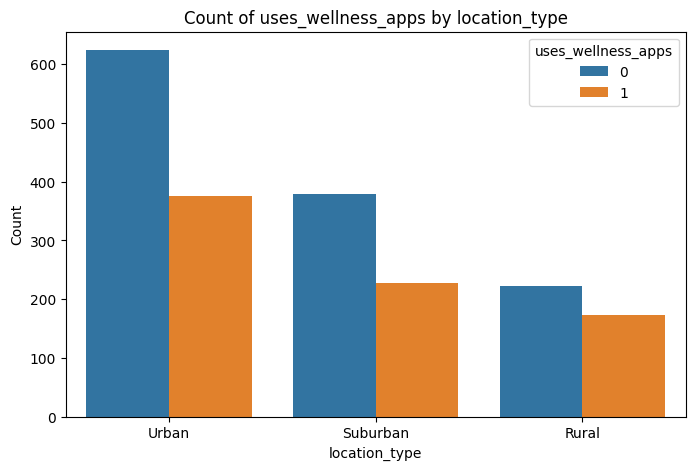


--- Count Plots for Categorical Features by target: eats_healthy ---


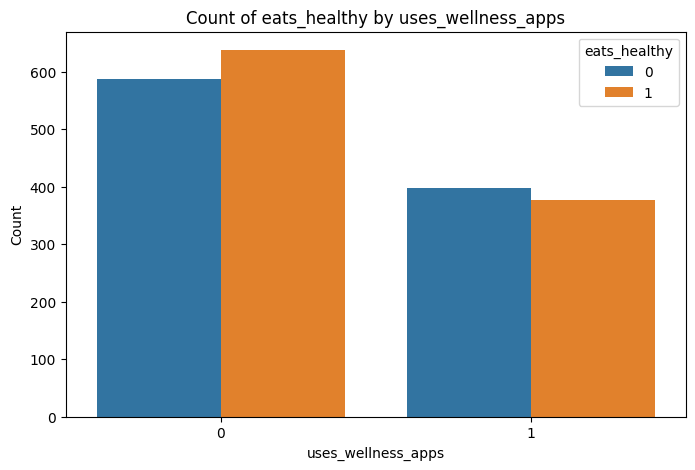

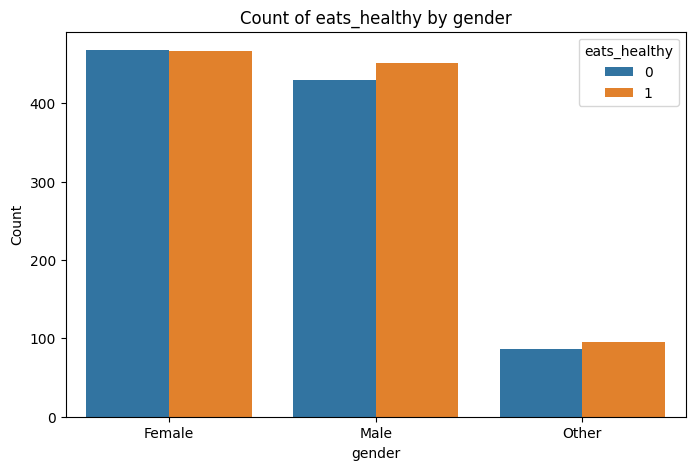

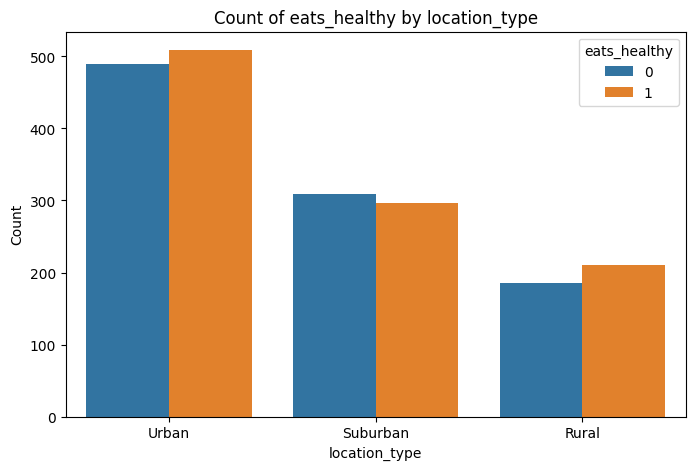

In [20]:
print("\nVisualizing relationships: Categorical Targets vs Categorical Features (Count Plots)")

# Use the same targets as the previous cell
targets_to_plot_cat = ['uses_wellness_apps', 'eats_healthy'] # Add others

for target in targets_to_plot_cat:
    if target not in valid_categorical_targets:
        print(f"Target '{target}' not in valid categorical targets. Skipping categorical feature plots.")
        continue
    print(f"\n--- Count Plots for Categorical Features by target: {target} ---")

    # Select other categorical columns, excluding the target itself
    features_to_plot = [col for col in valid_categorical_targets if col != target]

    for feature in features_to_plot:
        plt.figure(figsize=(8, 5))
        # Use hue to show the target distribution within each feature category
        sns.countplot(data=df, x=feature, hue=target)
        plt.title(f'Count of {target} by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

        # Optional: Plot proportions within each feature category for better comparison if category sizes differ
        # contingency_table_prop = pd.crosstab(df[feature], df[target], normalize='index')
        # contingency_table_prop.plot(kind='bar', stacked=True, figsize=(8, 5))
        # plt.title(f'Proportion of {target} by {feature}')
        # plt.xlabel(feature)
        # plt.ylabel('Proportion')
        # plt.legend(title=target)
        # plt.show()


Analyzing relationships: Model-Based Feature Importance (Regression Example)

--- Feature Importance for Regression Target: mental_health_score ---
Fitting Random Forest Regressor...
Fitting complete.

Top 15 Feature Importances (Random Forest Regressor):
                                  feature  importance
15        num__caffeine_intake_mg_per_day    0.071017
18       num__mindfulness_minutes_per_day    0.062002
1            num__daily_screen_time_hours    0.059825
10              num__sleep_duration_hours    0.056172
6                 num__social_media_hours    0.055800
2                  num__phone_usage_hours    0.054590
5                     num__tv_usage_hours    0.054506
8                num__entertainment_hours    0.052939
14  num__physical_activity_hours_per_week    0.052933
3                 num__laptop_usage_hours    0.050587
7                 num__work_related_hours    0.050322
0                                num__age    0.049513
9                       num__gaming_hours

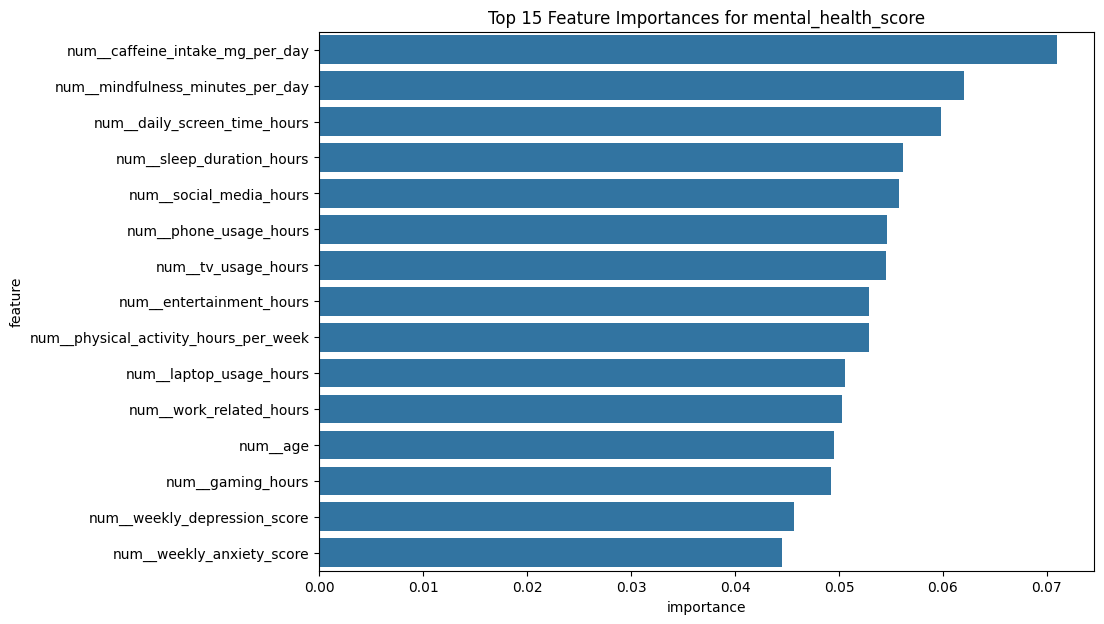

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Added StandardScaler for potential future use/good practice
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

print("\nAnalyzing relationships: Model-Based Feature Importance (Regression Example)")

target_reg_example = 'mental_health_score' # Choose a continuous target
if target_reg_example not in valid_continuous_targets:
    print(f"Target '{target_reg_example}' not in valid continuous targets. Skipping model-based importance.")
else:
    print(f"\n--- Feature Importance for Regression Target: {target_reg_example} ---")

    # Define features (all columns except user_id and the target itself)
    all_features = [col for col in df.columns if col not in [user_id_col, target_reg_example]]

    # Separate numerical and categorical features among the *input* features
    features_numerical = [col for col in all_features if col in numerical_cols]
    features_categorical = [col for col in all_features if col in categorical_cols]

    # Create a preprocessor to handle different column types
    # Using StandardScaler for numerical features (often good practice, although RF is less sensitive)
    # Using OneHotEncoder for categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), features_numerical), # Scale numerical features
            ('cat', OneHotEncoder(handle_unknown='ignore'), features_categorical)]) # One-hot encode categorical

    # Create a pipeline with preprocessing and the Random Forest Regressor
    model_reg = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))]) # Can tune n_estimators

    # Prepare data - drop rows where the target is missing
    df_cleaned = df.dropna(subset=[target_reg_example]).copy()
    X = df_cleaned[all_features]
    y = df_cleaned[target_reg_example]

    # Fit the model
    print("Fitting Random Forest Regressor...")
    model_reg.fit(X, y)
    print("Fitting complete.")

    # Get feature importances from the fitted model
    importances = model_reg.named_steps['regressor'].feature_importances_

    # Get the names of the features *after* preprocessing (including OHE features)
    # This requires the preprocessor to have 'get_feature_names_out' method (available in recent sklearn)
    try:
        feature_names_out = model_reg.named_steps['preprocessor'].get_feature_names_out()
    except AttributeError:
        # Fallback for older sklearn versions - might need manual mapping for OHE features
        print("\nWarning: 'get_feature_names_out' not available. Feature names might be less descriptive.")
        feature_names_out = all_features # Simple fallback, less precise for OHE

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'feature': feature_names_out, 'importance': importances})

    # Sort and print top N features by importance
    print("\nTop 15 Feature Importances (Random Forest Regressor):")
    print(feature_importance_df.sort_values('importance', ascending=False).head(15))

    # Optional: Visualize feature importances
    plt.figure(figsize=(10, 7))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.sort_values('importance', ascending=False).head(15))
    plt.title(f'Top 15 Feature Importances for {target_reg_example}')
    plt.show()


Analyzing relationships: Model-Based Feature Importance (Classification Example)

--- Feature Importance for Classification Target: uses_wellness_apps ---
Fitting Random Forest Classifier...
Fitting complete.

Top 15 Feature Importances (Random Forest Classifier):
                                  feature  importance
16        num__caffeine_intake_mg_per_day    0.060975
1            num__daily_screen_time_hours    0.055782
10              num__sleep_duration_hours    0.053623
0                                num__age    0.053555
15               num__mental_health_score    0.053141
19       num__mindfulness_minutes_per_day    0.052688
14  num__physical_activity_hours_per_week    0.052417
2                  num__phone_usage_hours    0.051730
8                num__entertainment_hours    0.050104
7                 num__work_related_hours    0.048594
6                 num__social_media_hours    0.048425
3                 num__laptop_usage_hours    0.047689
5                     num__tv_us

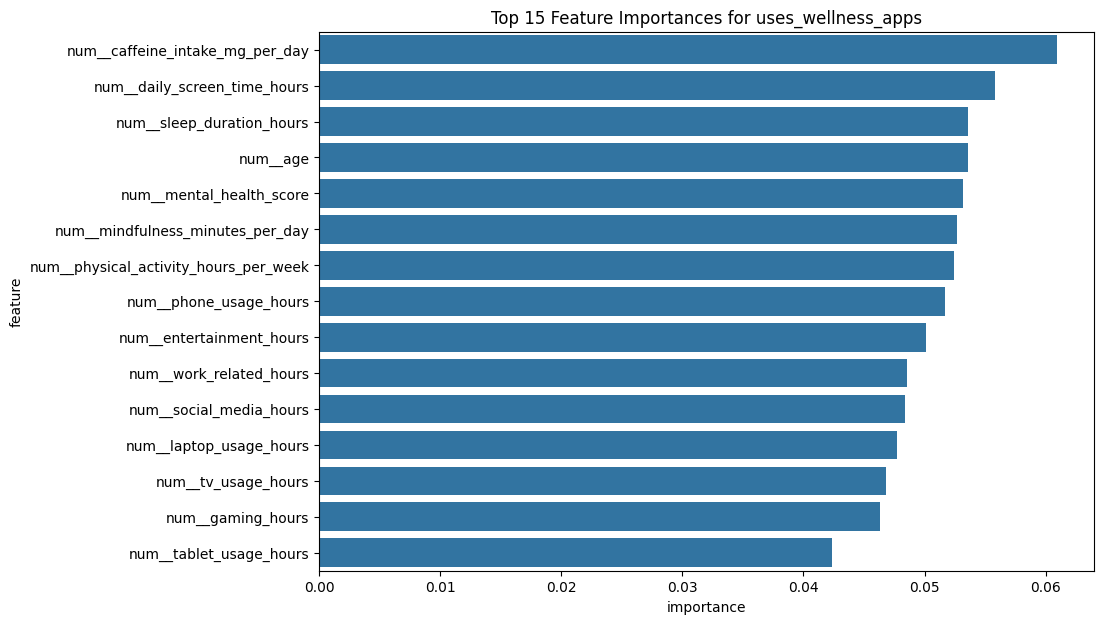

In [22]:
from sklearn.ensemble import RandomForestClassifier # Use Classifier for categorical target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

print("\nAnalyzing relationships: Model-Based Feature Importance (Classification Example)")

target_cls_example = 'uses_wellness_apps' # Choose a categorical target
if target_cls_example not in valid_categorical_targets:
     print(f"Target '{target_cls_example}' not in valid categorical targets. Skipping model-based importance.")
else:
    print(f"\n--- Feature Importance for Classification Target: {target_cls_example} ---")

    # Define features (all columns except user_id and the target itself)
    all_features = [col for col in df.columns if col not in [user_id_col, target_cls_example]]

    # Separate numerical and categorical features among the *input* features
    features_numerical = [col for col in all_features if col in numerical_cols]
    features_categorical = [col for col in all_features if col in categorical_cols]

    # Create a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), features_numerical), # Scale numerical features
            ('cat', OneHotEncoder(handle_unknown='ignore'), features_categorical)]) # One-hot encode categorical

    # Create a pipeline with preprocessing and the Random Forest Classifier
    model_cls = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))]) # Can tune n_estimators

    # Prepare data - drop rows where the target is missing
    df_cleaned = df.dropna(subset=[target_cls_example]).copy()
    X = df_cleaned[all_features]
    y = df_cleaned[target_cls_example]

    # Fit the model
    print("Fitting Random Forest Classifier...")
    model_cls.fit(X, y)
    print("Fitting complete.")

    # Get feature importances
    importances = model_cls.named_steps['classifier'].feature_importances_

    # Get the names of the features *after* preprocessing
    try:
        feature_names_out = model_cls.named_steps['preprocessor'].get_feature_names_out()
    except AttributeError:
        print("\nWarning: 'get_feature_names_out' not available. Feature names might be less descriptive.")
        feature_names_out = all_features # Simple fallback

    # Create a DataFrame
    feature_importance_df = pd.DataFrame({'feature': feature_names_out, 'importance': importances})

    # Sort and print top N features by importance
    print("\nTop 15 Feature Importances (Random Forest Classifier):")
    print(feature_importance_df.sort_values('importance', ascending=False).head(15))

    # Optional: Visualize feature importances
    plt.figure(figsize=(10, 7))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.sort_values('importance', ascending=False).head(15))
    plt.title(f'Top 15 Feature Importances for {target_cls_example}')
    plt.show()

In [26]:
import scipy.stats as stats

print("\nAnalyzing relationships: Categorical Targets vs Continuous Features (Distribution & Tests)")

# Choose one or two categorical targets to analyze
targets_to_analyze_cat = ['uses_wellness_apps', 'eats_healthy'] # Add others

for target in targets_to_analyze_cat:
    if target not in valid_categorical_targets:
        print(f"Target '{target}' not in valid categorical targets. Skipping continuous feature analysis.")
        continue
    print(f"\n--- Analyzing Continuous Features by target: {target} ---")

    # Select only numerical columns, excluding columns that might be the target
    features_to_analyze = [col for col in numerical_cols if col != target]

    for feature in features_to_analyze:
        print(f"\n  --- Analyzing {feature} by {target} ---")

        # Group stats are less intuitive here, but looking at mean/median of feature within each target category is useful
        # Ensure target column exists and is categorical, feature column exists and is numerical
        if target in df.columns and feature in df.columns:
             try:
                # Calculate group statistics, handle potential errors if target/feature types are unexpected
                group_stats = df.groupby(target)[feature].agg(['mean', 'median', 'std', 'count']).dropna()
                print("  Group Statistics (Feature mean/median by Target category):")
                print(group_stats)
             except Exception as e:
                print(f"  Could not calculate group statistics for {feature} by {target}: {e}")
                group_stats = pd.DataFrame() # Ensure group_stats is defined even on error

        # Perform statistical test (e.g., Mann-Whitney U for binary target, Kruskal-Wallis for >2)
        # These are non-parametric and don't assume normality or equal variance
        unique_targets = df[target].dropna().unique()
        # Ensure target and feature columns are valid and get data for each group, dropping NaNs
        valid_groups_data = []
        if target in df.columns and feature in df.columns:
            valid_groups_data = [df[df[target] == cat][feature].dropna() for cat in unique_targets]
            valid_groups_data = [group for group in valid_groups_data if len(group) > 1] # Filter out groups with <= 1 sample

        if len(valid_groups_data) == 2:
            try:
                # Mann-Whitney U test (non-parametric alternative to t-test)
                stat, p_value = stats.mannwhitneyu(valid_groups_data[0], valid_groups_data[1])
                print(f"  Mann-Whitney U test p-value: {p_value:.4f} (Lower p suggests different distributions)")
            except ValueError as e:
                print(f"  Could not perform Mann-Whitney U test: {e}")

        elif len(valid_groups_data) > 2:
            try:
                # Kruskal-Wallis H test (non-parametric alternative to ANOVA)
                stat, p_value = stats.kruskal(*valid_groups_data)
                print(f"  Kruskal-Wallis H test p-value: {p_value:.4f} (Lower p suggests different distributions across groups)")
            except ValueError as e:
                print(f"  Could not perform Kruskal-Wallis test: {e}")
        elif len(valid_groups_data) <= 1:
             print("  Not enough valid groups to perform statistical test.")
        else:
             print(f"  Skipping statistical test for {feature} by {target} due to invalid data or column types.")


Analyzing relationships: Categorical Targets vs Continuous Features (Distribution & Tests)

--- Analyzing Continuous Features by target: uses_wellness_apps ---

  --- Analyzing age by uses_wellness_apps ---
  Group Statistics (Feature mean/median by Target category):
                         mean  median        std  count
uses_wellness_apps                                     
0                   38.213878    38.0  14.884522   1225
1                   39.740645    41.0  14.961487    775
  Mann-Whitney U test p-value: 0.0249 (Lower p suggests different distributions)

  --- Analyzing daily_screen_time_hours by uses_wellness_apps ---
  Group Statistics (Feature mean/median by Target category):
                        mean  median       std  count
uses_wellness_apps                                   
0                   5.982776     6.0  1.960514   1225
1                   6.093290     6.1  1.994840    775
  Mann-Whitney U test p-value: 0.3506 (Lower p suggests different distributions)

